# Importation des Packages

In [13]:
import pickle
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np
from sklearn.linear_model   import LinearRegression 
from sklearn.neural_network import MLPRegressor 
from sklearn.neighbors      import KNeighborsRegressor 
from sklearn.svm            import SVR 
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

# Step 1 : Importation des données

In [14]:
df=pd.read_excel("Retail Sales Dataset.xlsx")
df.head()

,Date,Sales
0,2014-01-01,0
1,2014-01-02,70
2,2014-01-03,59
3,2014-01-04,93
4,2014-01-05,96


# Step 2 : Analyse de la série temporelle

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    937 non-null    datetime64[ns]
 1   Sales   937 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 14.8 KB


This time series includes:
* 937 samples
* daily sampled ( approximately 3 years)

## Analyse graphique

Text(0.5, 1.0, 'Evolution of Sales during 3 years ')

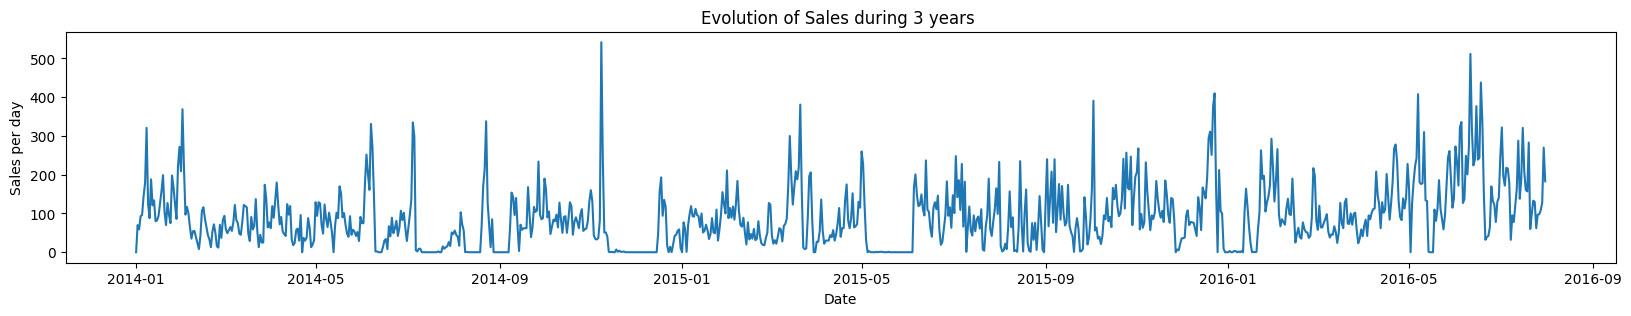

In [16]:
plt.figure(figsize=(20,3))
plt.plot(df["Date"], df["Sales"])
plt.xlabel("Date")
plt.ylabel("Sales per day")
plt.title("Evolution of Sales during 3 years ")

Interpretation: The graph depicts a pattern of alternating between periods of peak sales and downturns, repeating three times. Particularly notable is the outset of a strong sales peak followed by a sharp decline. This intricate dynamic makes it challenging to discern a clear trend in sales from this graphical representation. Nevertheless, the analysis suggests that sales appear to follow a cyclical pattern, implying periodic recurrence rather than a linear or constant evolution over time.

## Tests de stationnarité

This part is conducted using R language.

Test ADF:
First model: with constant and trend: p-value < 2.2e-16: stationary (Thus, there is no need to perform the 2nd and 3rd models of the ADF test)

Test PP:  First model: with trend: p-value < 2.2e-16: stationary (There is thus no need to perform the second model of the PP test)

Conclusion: The results of the Augmented Dickey-Fuller (ADF) and Phillips-Perron (PP) tests indicate that the series is stationary. (There is no need to proceed to the KPSS test.)

# Step 3 : Préparation des données

## 3.1 Data Loading

In [17]:
def load_data(data,seq_len):
    x=[]
    y=[]
    for i in range(seq_len,len(data)):
         x.append(data.iloc[i-seq_len:i,1])
         y.append(data.iloc[i,1])
    return x,y
x,y=load_data(df,3)

## 3.2 Data split

We have split the dataset into 80% for train and 20% for test

In [18]:
train_size=int(len(df['Sales'])*0.8)
x_train=x[:train_size]
y_train=y[:train_size]
x_test=x[train_size:]
y_test=y[train_size:]
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [19]:
print(len(y_train))
print(len(y_test))

749
185


# Step 4 : Machine Learning

In [20]:
#Linear regression model
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)
# Neural Network
neural_network=MLPRegressor(hidden_layer_sizes=(4,4),activation="logistic",solver='adam')
neural_network.fit(x_train,y_train)
#KNN
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
#support vector Machines
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVR(kernel='linear')

In [21]:
y_pred_lr=linear_regression.predict(x_test)
y_pred_nn=neural_network.predict(x_test)
y_pred_knn=knn.predict(x_test)
y_pred_svr=svr.predict(x_test)

# Step 5: Performance Evaluation

## Quantitative Evaluation

In [22]:
print(" ************ Linear Regression Performance ***************")
print("MSE:", mean_squared_error(y_test,y_pred_lr))
print("MAE:", mean_absolute_error(y_test,y_pred_lr))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred_lr))
print(" ************ Neural Netwrok Performance ***************")
print("MSE:", mean_squared_error(y_test,y_pred_nn))
print("MAE:", mean_absolute_error(y_test,y_pred_nn))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred_nn))
print(" ************ KNN Performance ***************")
print("MSE:", mean_squared_error(y_test,y_pred_knn))
print("MAE:", mean_absolute_error(y_test,y_pred_knn))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred_knn))
print(" ************ SVR Performance ***************")
print("MSE:", mean_squared_error(y_test,y_pred_svr))
print("MAE:", mean_absolute_error(y_test,y_pred_svr))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred_svr))

 ************ Linear Regression Performance ***************
MSE: 5207.615732535289
MAE: 50.71038603607449
MAPE: 5670842658094925.0
 ************ Neural Netwrok Performance ***************
MSE: 25856.51716963696
MAE: 133.41850581454514
MAPE: 538708266212879.6
 ************ KNN Performance ***************
MSE: 6018.758486486487
MAE: 57.22594594594595
MAPE: 5983701558960368.0
 ************ SVR Performance ***************
MSE: 5418.497471569916
MAE: 52.63154087587874
MAPE: 4107884542372667.0


**Interpretation:** The linear regression appears to have the best performance in terms of MSE and MAE, indicating relatively low prediction errors. However, the MAPE is very high, which may indicate outliers or an under-representation of relative errors. SVR performs similarly to linear regression in terms of MSE and MAE, with a slightly lower MAPE. KNN has intermediate MSE and MAE compared to other models, but its MAPE is the highest, suggesting larger relative errors. The neural network has the highest MSE and MAE, indicating higher prediction errors than linear regression. However, the MAPE is slightly lower than that of linear regression but remains high.

## Qualitative Evaluation

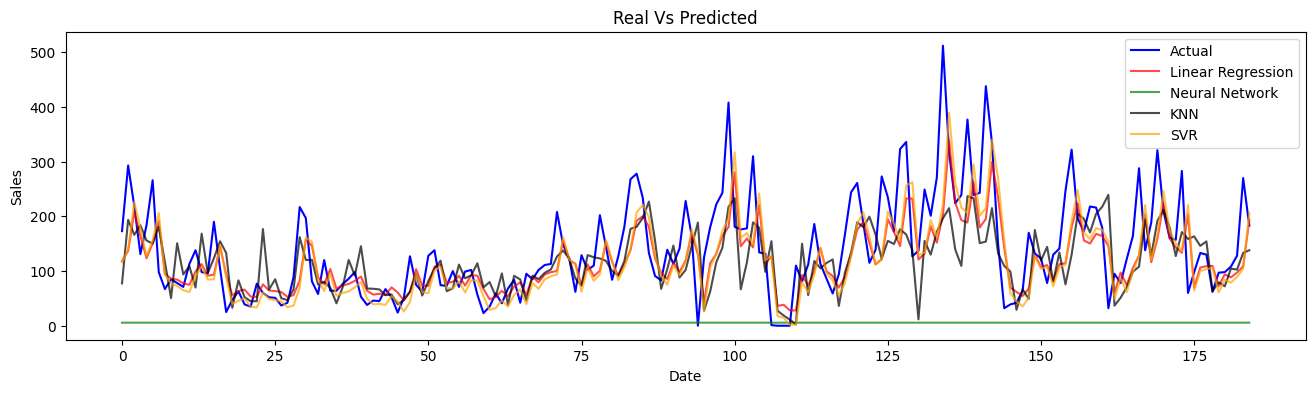

In [23]:
plt.figure(figsize=(16,4))
plt.plot(y_test, color='blue',label='Actual')
plt.plot(y_pred_lr, alpha=0.7, color='red',label='Linear Regression')
plt.plot(y_pred_nn, alpha=0.7, color='green',label='Neural Network')
plt.plot(y_pred_knn, alpha=0.7, color='black',label='KNN')
plt.plot(y_pred_svr, alpha=0.7, color='orange',label='SVR')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

**interpretation:** Linear regression and SVR appear to be the most effective models as their curves closely align with the reality line. On the other hand, the neural network stands out as the least effective model, with its curve deviating furthest from the reality line. Lastly, while KNN outperforms the neural network, it remains less effective than the other two models.

# Step 6 : Model Deployment

In [24]:
pickle.dump(linear_regression,open("SALES.pickle","wb"))